In [ ]:
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Esse notebook é uma implementação do código acessado em: https://www.kaggle.com/dipam7/image-segmentation-using-fastai/notebook

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.callbacks.hooks import *

In [ ]:
# Dataset: CAMVID - http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/

path = untar_data(URLs.CAMVID)  
path.ls()

[PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/valid.txt')]

In [ ]:
path_lbl = path/'labels'
path_img = path/'images'

In [ ]:
fnames = get_image_files(path_img)

In [ ]:
lbl_names = get_image_files(path_lbl)

In [ ]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [ ]:
img_f = fnames[0]
mask = open_mask(get_y_fn(img_f))

In [ ]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
          [ 4,  4,  4,  ..., 21, 21, 21],
          [ 4,  4,  4,  ..., 21, 21, 21],
          ...,
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17],
          [19, 19, 19,  ..., 17, 17, 17]]]))

In [ ]:
size = src_size//2

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [ ]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')   # faz o slipt do dataset a partir dos nomes de imagens do arquivo de validação
       .label_from_func(get_y_fn, classes=codes))

In [ ]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=8, num_workers=0)
        .normalize(imagenet_stats))

In [ ]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [ ]:
metrics=acc_camvid

In [ ]:
wd=1e-2 
# Weight decay

In [ ]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


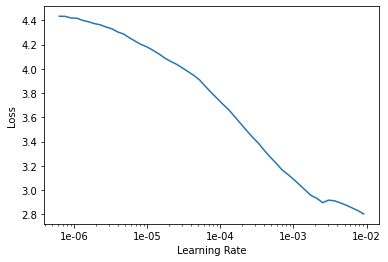

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, slice(1e-06,1e-03), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.517335,1.020993,0.742490,02:11
1,0.981917,0.754896,0.815048,02:08
2,0.761000,0.555772,0.848755,02:08
3,0.651148,0.499092,0.865817,02:08
4,0.600213,0.468204,0.872299,02:07
5,0.582878,0.449523,0.869829,02:07
6,0.547966,0.427501,0.872428,02:07
7,0.508500,0.485780,0.856716,02:07
8,0.500032,0.380159,0.900444,02:07
9,0.424316,0.318659,0.910301,02:06


In [ ]:
learn.save('resnet34_learnrate1')

In [ ]:
learn.export('/content/drive/My Drive/resnet34_learnrate1.pkl')

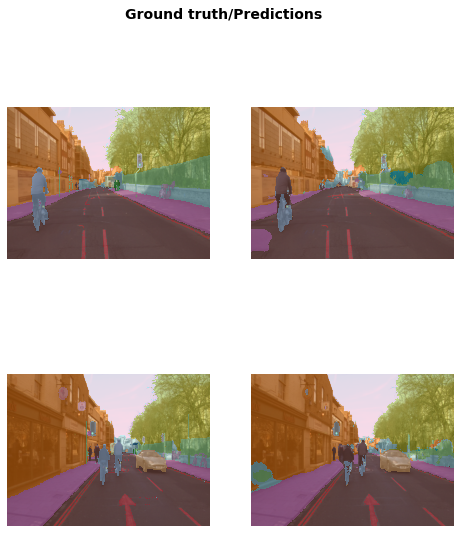

In [ ]:
learn.show_results(rows=2, figsize=(8,9))


In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


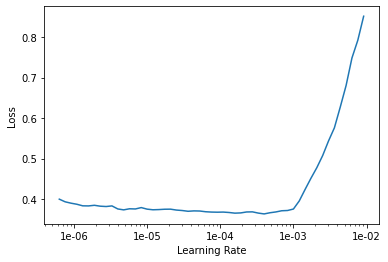

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, slice(1e-5,1e-4), pct_start=0.8)


epoch,train_loss,valid_loss,acc_camvid,time
0,0.359208,0.310893,0.911277,02:11
1,0.359718,0.307889,0.913312,02:10
2,0.352014,0.298627,0.914659,02:10
3,0.337297,0.292355,0.916274,02:10
4,0.325073,0.283317,0.919135,02:10
5,0.314033,0.289127,0.915541,02:10
6,0.306217,0.270913,0.922238,02:10
7,0.297429,0.274713,0.920043,02:10
8,0.285903,0.269497,0.923629,02:10
9,0.270209,0.264876,0.924627,02:10


In [ ]:
learn.save('resnet34_learnrate2')

In [ ]:
learn.export('/content/drive/My Drive/resnet34_learnrate2.pkl')

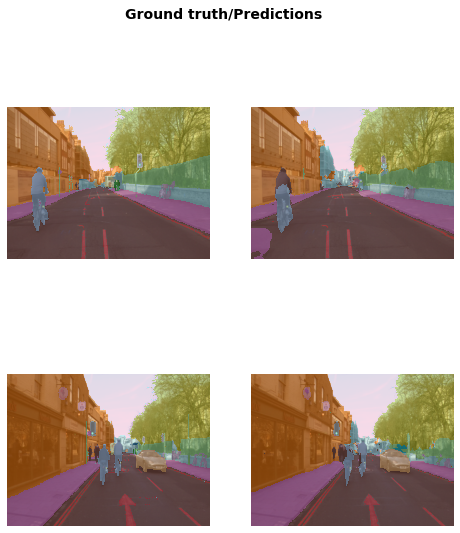

In [ ]:
learn.show_results(rows=2, figsize=(8,9))

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


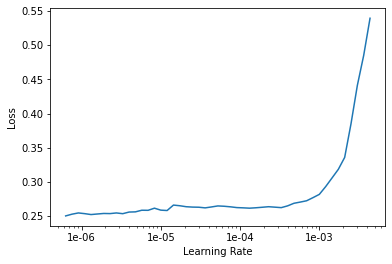

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, slice(1e-4,1e-3), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.266407,0.267384,0.924829,02:10
1,0.267499,0.311581,0.914789,02:10
2,0.286971,0.305078,0.911989,02:10
3,0.324618,0.326366,0.909143,02:09
4,0.343613,0.413990,0.884895,02:10
5,0.348055,0.315710,0.912013,02:09
6,0.359296,0.324194,0.908182,02:09
7,0.357321,0.297925,0.921962,02:09
8,0.336467,0.257896,0.927886,02:09
9,0.276305,0.265090,0.926047,02:09


In [ ]:
learn.save('resnet34_learnrate3')

In [ ]:
learn.export('/content/drive/My Drive/resnet34_learnrate3.pkl')

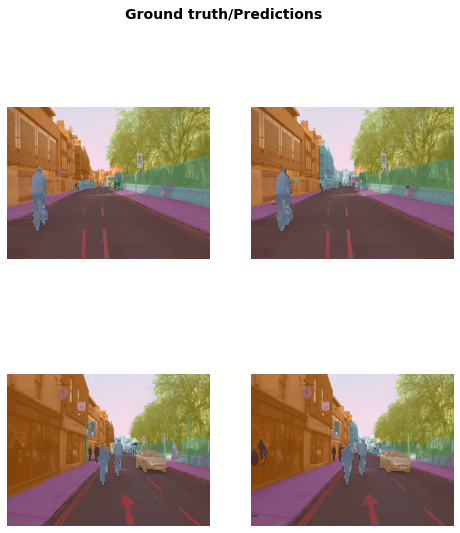

In [ ]:
learn.show_results(rows=2, figsize=(8,9))